##L04
###Øvelse
I denne øvelse skal I eksperimentere med Principal Component Analysis (PCA) til dimensionsreduktion
og visualisering. I skal arbejde med datasættet ”Handwritten digits” fra Scikit Learn, som er scannede
billeder af håndskrevne tal imellem 0 og 9 (dvs. 10 kategorier).

a) Indlæs data og lav kort data-analyse, fx. plot nogle eksempel billeder



X.shape=(70000, 784)
X.shape=(70000, 784)


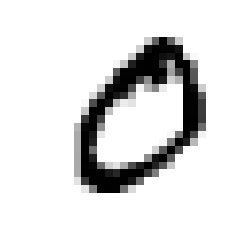

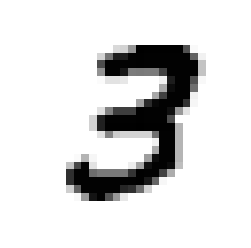

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ClassifierModule

X,y = ClassifierModule.MNIST_GetDataSet()

ClassifierModule.MNIST_PlotDigit(X[1])
ClassifierModule.MNIST_PlotDigit(X[7])


b) Plot de forskellige tal/digits i 2D efter PCA dimensionsreduktion.

In [0]:
pca = PCA(n_components=0.95) #ratio of variance preserved
X_reduced = pca.fit_transform(X) #apply PCA
X_recovered = pca.inverse_transform(X_reduced) #recover image

Dimensioner efter reduktion:  154


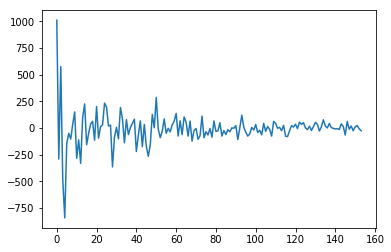

In [3]:
print("Dimensioner efter reduktion: ", pca.n_components_)
plt.plot(X_reduced[1])

###Øvelse2
I denne øvelse skal I benytte PCA til kompression/dekompression af data. I skal først benytte eksemplet
nedenfor til at komprimere (transformere) data ned til en lavere dimension og dernæst rekonstruere
billedet igen.

a) Plot varianserne (explained_variance_ i PCA objekt – med n_components til max.) – relater til
valg af komponenter.

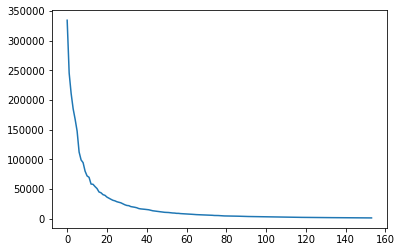

In [4]:
plt.plot(pca.explained_variance_)

b) Rekonstruér nogle tal og sammenlign med de originale – ligner de ?

Reconstructed:


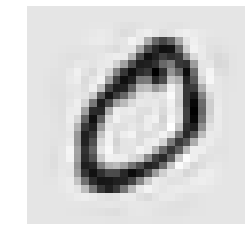

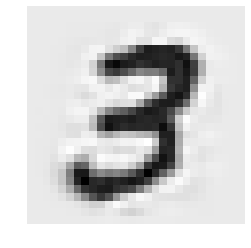

Original:


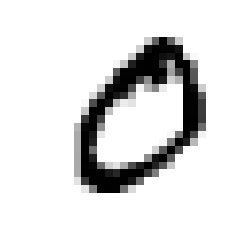

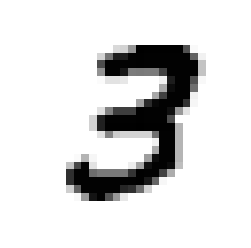

In [5]:
print("Reconstructed:")
ClassifierModule.MNIST_PlotDigit(X_recovered[1])
ClassifierModule.MNIST_PlotDigit(X_recovered[7])
print("Original:")
ClassifierModule.MNIST_PlotDigit(X[1])
ClassifierModule.MNIST_PlotDigit(X[7])

Der ses en høj grad af lighed mellem de originale tal og rekonstruerede PCA-komprimerede tal og de er bestemt genkendelige.
Der ses også en del artefakter efter komprimeringen og baggrunden er grå i stedet for hvid. 

c) Hvor meget data fylder jeres billeder før og efter kompressionen ?

In [6]:
print("Compression factor: ", X_reduced.size/X.size) 
print("Size of dataset in bytes after compression, before compression:", X_reduced.nbytes, ",", X.nbytes)
print("Size of image in bytes after compression, before compression:", X_reduced[1].nbytes, ",", X[1].nbytes)
print(X[1,:].size)

Compression factor:  0.19642857142857142
Size of dataset in bytes after compression, before compression: 86240000 , 439040000
Size of image in bytes after compression, before compression: 1232 , 6272
784


d) Plot også middelværdi-billedet (dvs. rekonstruér udfra middelværdien).

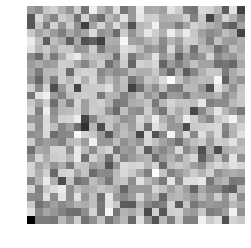

(70000, 784)

In [7]:
X_mean = np.zeros(len(X[1]))
for m in range(len(X[1])):
  X_mean[m] = np.mean(X[m,:])

ClassifierModule.MNIST_PlotDigit(X_mean)
X.shape

De 10 tal ser ret forskellige ud, så det kan give mening at lave PCA for hvert ciffer individuelt. Lav en PCA
kompression for et enkelt tal (fx. 3).

a) Plot igen middelværdi-billedet (dvs. rekonstruér udfra middelværdien).


In [13]:
X_reduced_arr =  []
X_recovered_arr = []
pca_arr = []
y_arr = []
X_list = 10*[[]]
Y_list = 10*[[]]

for m in range(len(X[1])):
  (X_list[int(y[m])]).append(X[m].tolist()) 
X_arr = np.zeros([10, len(X_list[1])])
print(len(X_list[2]))
X_arr = np.asarray(X_list)
#for m in range(10):
#  X_arr[m] = np.asarray(X_list[m])


#goal: get 10 arrays with X for y=0:9

#for m in range(len(X[1])):
#  pca_arr.append(PCA(n_components=0.95))
#  X_reduced_arr.append(pca_arr[m].fit_transform([X[m,:]]))
#  X_recovered_arr.append(pca_arr[m].inverse_transform(X_reduced_arr[m])) #recover image
#ClassifierModule.MNIST_PlotDigit(X_recovered_arr[1])


784


b) Plot også ”eigenfaces” for første og anden principal komponent, dvs. ”hvor meget de enkelte
pixels bidrager til beskrivelse af variansen i tallet”.

In [0]:
eigenfaces = pca.components_.reshape((n_components, h, w))

###Øvelse 3
Afprøv PCA på jeres egne data og projekt.

##L05

###Øvelse 1
I skal analysere på ”California housing prices” (https://www.kaggle.com/camnugent/california-housing-prices), som også benyttes i lærebogen.

a) Plot fordelingen af median_income. Find også spredning, middelværdi og median.


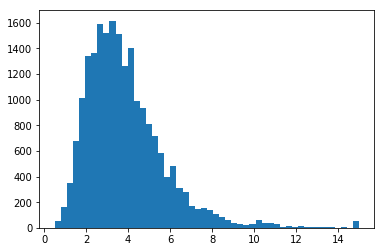

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
_ = plt.hist(housing.median_income, 50)

b) Er der forskel på median og middelværdi af median_income ? Hvilken af de to beskriver bedst
en ”almindelig families indkomst” og hvorfor ?


Middelværdien er defineret ved gennemsnittet af median_income. 
Medianen af median_income er den mellemste værdi når median_income optræder som sorteret liste.
Derved er der forskel.

En almindelig familie repræsenteres bedst af medianen da områder med meget høj indkomst potentielt trækker gennemsnittet meget op, hvilket undgås ved at bruge medianen.


c) Fit en normalfordeling til data og plot histogrammet – passer de to ?


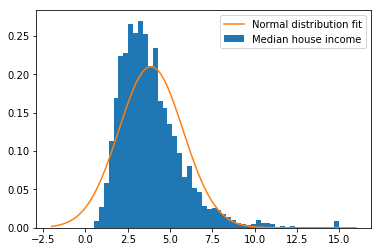

In [13]:
from scipy import stats
plt.hist(housing.median_income, 50, density=True, label="Median house income")
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(housing.median_income))

# lets try the normal distribution first
m, s = stats.norm.fit(housing.median_income) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
_ = plt.plot(lnspc, pdf_g, label="Normal distribution fit") # plot it
_ = plt.legend()


d) Er der sammenhæng imellem median_house_value og median_income ? Lav korrelationsplot.


e) Hvad er 5% og 95% percentilerne af median_house_value ? (dvs. grænserne for 5% laveste og
højeste). Plot også fordelingen af median_house_value. Kommentér på realismen af max-værdi
og 95% percentil – foreslå gerne en løsning til hvad man kan gøre ved dette, hvis man skal have
mere realistiske data.

###Øvelse 2
Lav data analyse på jeres egne data og projekt